In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
# till now
# Timestamp
pd.Timestamp('6th jan 2023 8:10')
# DatetimeIndex -> df and series index
pd.DatetimeIndex([pd.Timestamp('6th jan 2023 8:10'),pd.Timestamp('7th jan 2023 8:10'),pd.Timestamp('8th jan 2023 8:10')])[0]
# date_range()
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
pd.to_datetime(s)

0   2023-01-06
1   2023-01-07
2   2023-01-07
dtype: datetime64[ns]

Timedelta Object

Represents a duration, the difference between two dates or times.

In [7]:
# create using Timestamp objects
t1 = pd.Timestamp('6th January 2023')
t2 = pd.Timestamp('26th January 2023')

t2-t1

Timedelta('20 days 00:00:00')

In [9]:
# standalone creation
pd.Timedelta(days=2,hours=10)

Timedelta('2 days 10:00:00')

In [11]:
# Arithmetic
pd.Timestamp('6th jan 2023') + pd.Timedelta(days=2,hours=10)

Timestamp('2023-01-08 10:00:00')

In [12]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')

DatetimeIndex(['2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D') + pd.Timedelta(days=2,hours=10)

DatetimeIndex(['2023-01-08 10:00:00', '2023-01-09 10:00:00',
               '2023-01-10 10:00:00', '2023-01-11 10:00:00',
               '2023-01-12 10:00:00', '2023-01-13 10:00:00',
               '2023-01-14 10:00:00', '2023-01-15 10:00:00',
               '2023-01-16 10:00:00', '2023-01-17 10:00:00',
               '2023-01-18 10:00:00', '2023-01-19 10:00:00',
               '2023-01-20 10:00:00', '2023-01-21 10:00:00',
               '2023-01-22 10:00:00', '2023-01-23 10:00:00',
               '2023-01-24 10:00:00', '2023-01-25 10:00:00',
               '2023-01-26 10:00:00', '2023-01-27 10:00:00',
               '2023-01-28 10:00:00', '2023-01-29 10:00:00',
               '2023-01-30 10:00:00', '2023-01-31 10:00:00',
               '2023-02-01 10:00:00', '2023-02-02 10:00:00'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# real life example

Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.


Examples
Financial Data (Company stocks)
Natural Data (Rainfall measurement)
Event Data (Covid)
Medical Data (Heart rate monitoring)


Types of Operations done on Time Series
Time Series Analysis
Time Series Forecasting

In [14]:
df = pd.read_csv('datas/GOOGL.csv')

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [31]:
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = pd.to_datetime(df[i])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4431 non-null   datetime64[ns]
 1   Open       4431 non-null   float64       
 2   High       4431 non-null   float64       
 3   Low        4431 non-null   float64       
 4   Close      4431 non-null   float64       
 5   Adj Close  4431 non-null   float64       
 6   Volume     4431 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 242.4 KB


In [33]:
df.set_index('Date',inplace=True)

In [34]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


In [36]:
# fetch a specific date

df.loc['2020-1-24']

Open         1.492820e+03
High         1.494200e+03
Low          1.463180e+03
Close        1.466170e+03
Adj Close    1.466170e+03
Volume       1.489300e+06
Name: 2020-01-24 00:00:00, dtype: float64

In [37]:
# partial indexing -> select a particular year/month

df.loc['2021-12']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,2880.000000,2919.010010,2818.239990,2821.030029,2821.030029,1701000
2021-12-02,2825.000000,2877.290039,2804.290039,2859.320068,2859.320068,1459700
2021-12-03,2873.620117,2888.000000,2806.020020,2840.030029,2840.030029,2061500
2021-12-06,2860.810059,2877.050049,2803.000000,2863.100098,2863.100098,1530900
2021-12-07,2911.929932,2950.620117,2904.550049,2945.389893,2945.389893,1612000
2021-12-08,2951.929932,2967.860107,2928.120117,2963.729980,2963.729980,1213500
2021-12-09,2951.820068,2982.000000,2942.300049,2952.770020,2952.770020,1163500
2021-12-10,2974.000000,2979.550049,2934.080078,2960.030029,2960.030029,1222900
2021-12-13,2955.629883,2959.399902,2910.350098,2916.530029,2916.530029,1353500


In [38]:
# create year month-name and day-name

df['month-name'] = df.index.month_name()
df['weekday-name'] = df.index.day_name()
df['quarter'] = df.index.quarter

In [39]:
df

,Open,High,Low,Close,Adj Close,Volume,month-name,weekday-name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100,March,Friday,1
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600,March,Monday,1
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800,March,Tuesday,1


In [40]:
# slicing

df.loc['2020-12-15':'2021-12-15']

,Open,High,Low,Close,Adj Close,Volume,month-name,weekday-name,quarter
Date,,,,,,,,,
2020-12-15,1759.859985,1764.000000,1741.670044,1761.079956,1761.079956,1067600,December,Tuesday,4
2020-12-16,1769.109985,1769.109985,1749.060059,1757.189941,1757.189941,1233800,December,Wednesday,4
2020-12-17,1763.930054,1766.709961,1731.150024,1740.510010,1740.510010,1744000,December,Thursday,4
2020-12-18,1746.170044,1748.359985,1715.000000,1726.219971,1726.219971,4262800,December,Friday,4
2020-12-21,1709.130005,1737.000000,1694.000000,1734.560059,1734.560059,1698700,December,Monday,4
...,...,...,...,...,...,...,...,...,...
2021-12-09,2951.820068,2982.000000,2942.300049,2952.770020,2952.770020,1163500,December,Thursday,4
2021-12-10,2974.000000,2979.550049,2934.080078,2960.030029,2960.030029,1222900,December,Friday,4
2021-12-13,2955.629883,2959.399902,2910.350098,2916.530029,2916.530029,1353500,December,Monday,4


In [ ]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta

In [41]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,month-name,weekday-name,quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3


In [46]:
pd.date_range(start='2005-1-6',end='2020-1-6',freq=pd.Timedelta(days=365))

DatetimeIndex(['2005-01-06', '2006-01-06', '2007-01-06', '2008-01-06',
               '2009-01-05', '2010-01-05', '2011-01-05', '2012-01-05',
               '2013-01-04', '2014-01-04', '2015-01-04', '2016-01-04',
               '2017-01-03', '2018-01-03', '2019-01-03', '2020-01-03'],
              dtype='datetime64[ns]', freq='365D')

In [50]:
x = pd.date_range(start='2005-1-6',end='2020-1-6',freq=pd.DateOffset(years=1))

df[df.index.isin(x)]

,Open,High,Low,Close,Adj Close,Volume,month-name,weekday-name,quarter
Date,,,,,,,,,
2005-01-06,97.637634,98.048050,93.953957,94.369370,94.369370,20753426,January,Thursday,1
2006-01-06,228.663666,235.485489,226.846848,233.063065,233.063065,35478286,January,Friday,1
2009-01-06,166.656662,170.570572,163.358353,167.197205,167.197205,12837550,January,Tuesday,1
2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949443,January,Wednesday,1
2011-01-06,305.645660,309.524536,305.330322,307.057068,307.057068,4111484,January,Thursday,1
2012-01-06,329.904907,330.330322,325.220215,325.335327,325.335327,5380414,January,Friday,1
2014-01-06,557.062073,559.989990,553.773804,559.219238,559.219238,3535061,January,Monday,1
2015-01-06,520.500000,521.210022,505.549988,506.640015,506.640015,2722800,January,Tuesday,1
2016-01-06,750.369995,765.729980,748.000000,759.330017,759.330017,2410300,January,Wednesday,1


<AxesSubplot: xlabel='Date'>

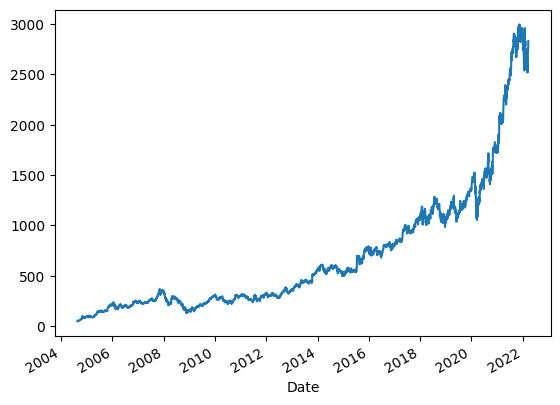

In [51]:
# viz a single col
df['Close'].plot()

<AxesSubplot: xlabel='Date'>

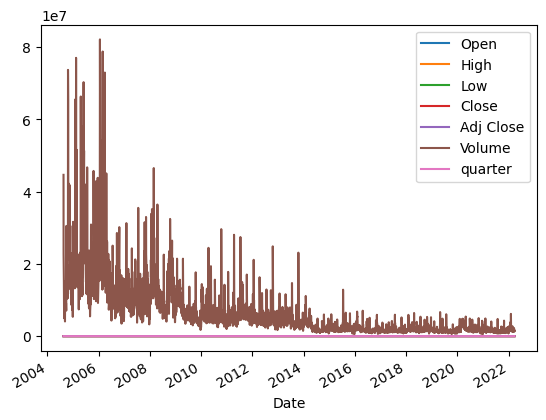

In [52]:
# viz all cols together
df.plot()

In [ ]:
# plot for a particular year/month/week

<AxesSubplot: xlabel='Date'>

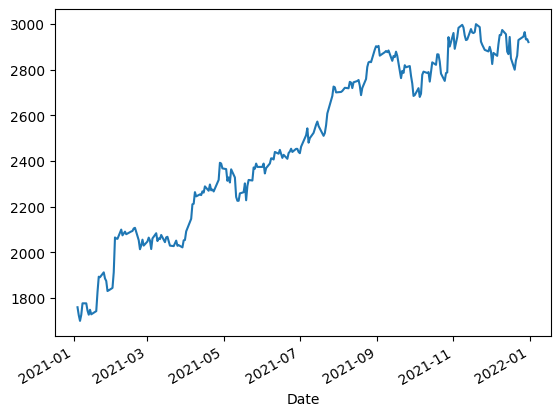

In [61]:
df.loc['2021']['Open'].plot()

<AxesSubplot: xlabel='Date'>

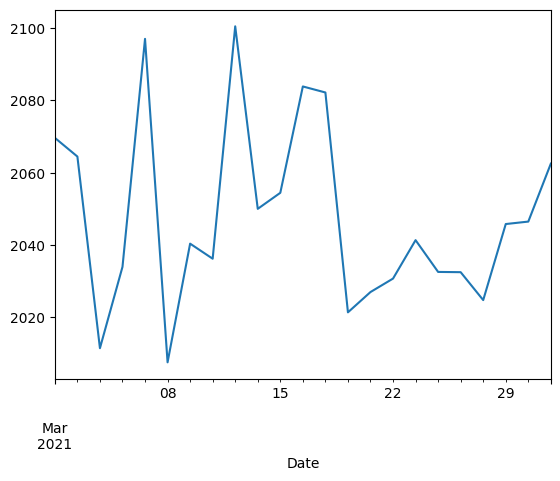

In [62]:
# monthly trend

df.loc['2021-03']['Close'].plot()

In [ ]:
#frequency

In [67]:
df.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=4431, freq=None)

In [69]:
df.asfreq('Y')

,Open,High,Low,Close,Adj Close,Volume,month-name,weekday-name,quarter
Date,,,,,,,,,
2004-12-31,99.714714,100.040039,96.376373,96.491493,96.491493,15321663.0,December,Friday,4.0
2005-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,349.634644,351.596588,345.635651,346.086090,346.086090,4747648.0,December,Monday,4.0
2008-12-31,152.252258,155.655655,151.456451,153.978973,153.978973,5767826.0,December,Wednesday,4.0
2009-12-31,312.687683,313.013000,310.300293,310.300293,310.300293,2437160.0,December,Thursday,4.0
2010-12-31,298.668671,299.509521,296.311310,297.282288,297.282288,3075521.0,December,Friday,4.0
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31,350.350342,355.640656,348.348358,354.044037,354.044037,3990805.0,December,Monday,4.0


<AxesSubplot: xlabel='month-name'>

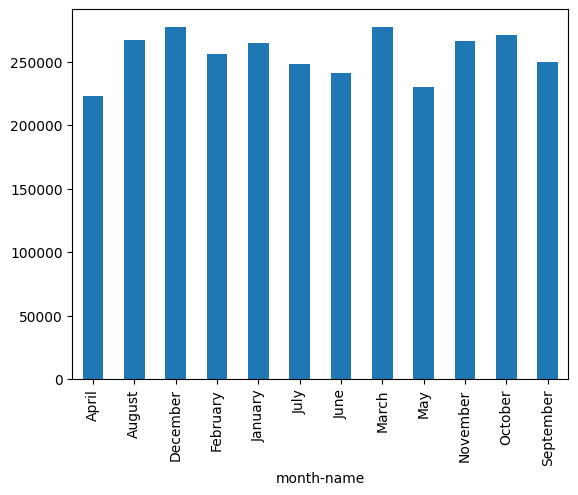

In [71]:
df.groupby('month-name')['Open'].sum().plot(kind='bar')

Date
2004-08-31    AxesSubplot(0.125,0.2;0.775x0.68)
2004-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2004-10-31    AxesSubplot(0.125,0.2;0.775x0.68)
2004-11-30    AxesSubplot(0.125,0.2;0.775x0.68)
2004-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
                            ...                
2021-11-30    AxesSubplot(0.125,0.2;0.775x0.68)
2021-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2022-01-31    AxesSubplot(0.125,0.2;0.775x0.68)
2022-02-28    AxesSubplot(0.125,0.2;0.775x0.68)
2022-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: M, Name: Close, Length: 212, dtype: object

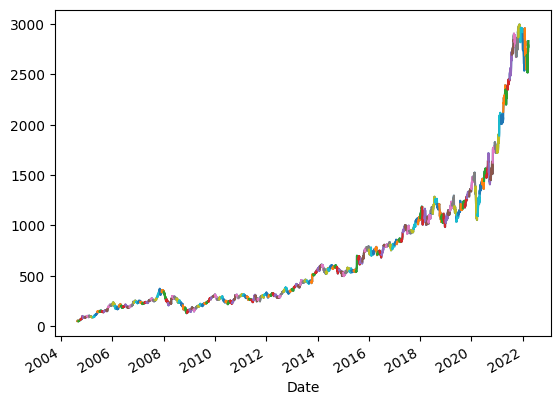

In [74]:
df['Close'].plot()
df['Close'].resample('M').plot()

<AxesSubplot: xlabel='Date'>

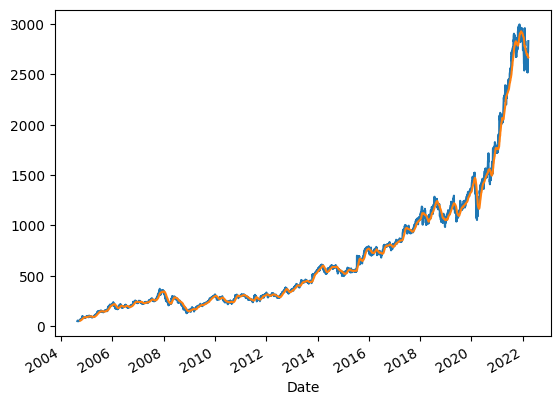

In [77]:
df['Close'].plot()
df['Close'].rolling(30).mean().plot()